<a href="https://colab.research.google.com/github/AhmedHatemS/Student-Depression/blob/main/Student_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project by:
- Ahmed Hatem Fathy
- Haydi Mohamed Ahmed

#Supervised By:
- Dr. Sayed AbdelGaber

Modeling for Data Analytics Course, Data Science Master's Program, Helwan University

#Problem Statement
Student depression is a growing concern worldwide, with significant impacts on academic performance, personal growth, and overall well-being. Numerous factors, such as academic pressure, financial stress, and social challenges, contribute to this issue. Identifying these factors and predicting at-risk students can help institutions implement targeted interventions and support programs.

This project aims to address the following questions:
- What are the key factors contributing to student depression?
- How can data modeling techniques help predict students at risk?
- What insights can be derived to guide effective mental health support strategies?

#Project Goals
The primary goals of this project are as follows:
1. **Analysis:**
   - Identify and quantify the relationships between academic performance, social factors, lifestyle habits, and depression levels.
   - Understand correlations and patterns in the dataset to uncover key contributors to student depression.

2. **Prediction:**
   - Develop a machine learning model to predict the likelihood of depression in students based on various factors.
   - Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

3. **Visualization:**
   - Create visualizations in Python to showcase trends, correlations, and predictions.
   - Develop an interactive Power BI dashboard for presenting actionable insights.

4. **Recommendations:**
   - Suggest interventions based on findings, such as counseling, academic support, or wellness programs.

#Deliverables
The final output of this project will include:
###A Google Colab Notebook with the following:
1. **Python-based Analysis:**
   - A well-documented notebook with code and comments covering:
     - Data exploration and preprocessing.
     - Feature engineering and selection.
     - Machine learning model development and evaluation.
     - Visualizations highlighting key insights.

2. **Report or Presentation:**
   - A concise summary of the project, including:
     - Problem statement and goals.
     - Methodology and findings.
     - Visualizations and recommendations.

#Used Dataset
###Student Depression Dataset.
Analyzing Mental Health Trends and Predictors Among Students.
[URL](https://www.kaggle.com/datasets/hopesb/student-depression-dataset)

###Why This Dataset is Suitable
1. **Relevance:**
It covers key factors related to mental health, such as academic pressure,
financial stress, and family history of mental illness.
Includes variables directly related to depression and potential predictors.

2. **Diversity of Variables:**
  - Demographics: Gender, Age, City, Profession.
  - Academic factors: CGPA, Academic Pressure, Study Satisfaction.
  - Lifestyle habits: Sleep Duration, Dietary Habits, Work/Study Hours.
  - Mental health indicators: Suicidal thoughts, Family history of mental illness.

3. **Data Size:** 27,901 rows are sufficient for statistical analysis and modeling while being manageable for processing.

#Import and Load the Data

In [ ]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Preprocessing and Dimensionality Reduction
from sklearn.preprocessing import StandardScaler

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import (
    accuracy_score, f1_score, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

#To Save Model
import os
import joblib
from google.colab import files
from google.colab import drive
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Load dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/StudentDepressionModel/Student Depression Dataset.csv')

Mounted at /content/drive


In [ ]:
#Setting variables
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
gender_map = {'Male': 0, 'Female': 1}
age_group_map = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-60': 4}
cgpa_map = {'Low CGPA': 0, 'Below Average CGPA': 1, 'Average CGPA': 2, 'High CGPA': 3}
sleep_duration_map = {'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3, 'Others': 4}
dietary_habits_map = {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2, 'Others': 3}
yes_no_map = {'Yes': 1, 'No': 0}

In [ ]:
df.shape

(27901, 18)

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


#Exploratory Data Analysis (EDA)
Analyze the dataset to understand its structure and quality

##Check for Missing Values:

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


##Explore Data Distributions:

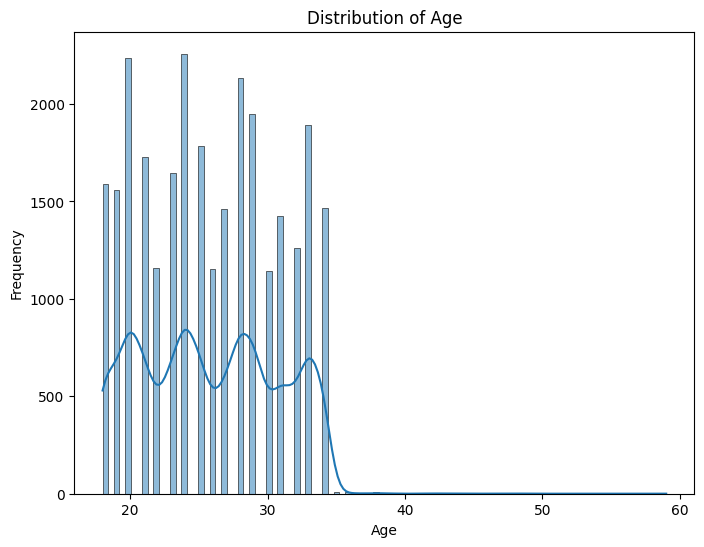

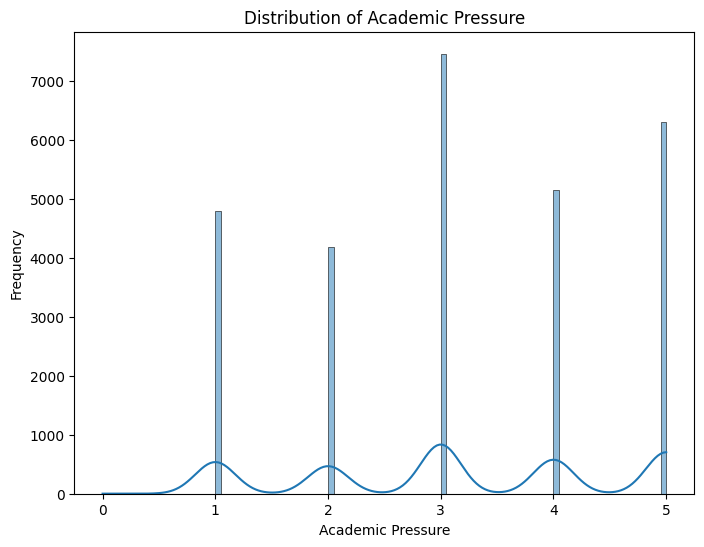

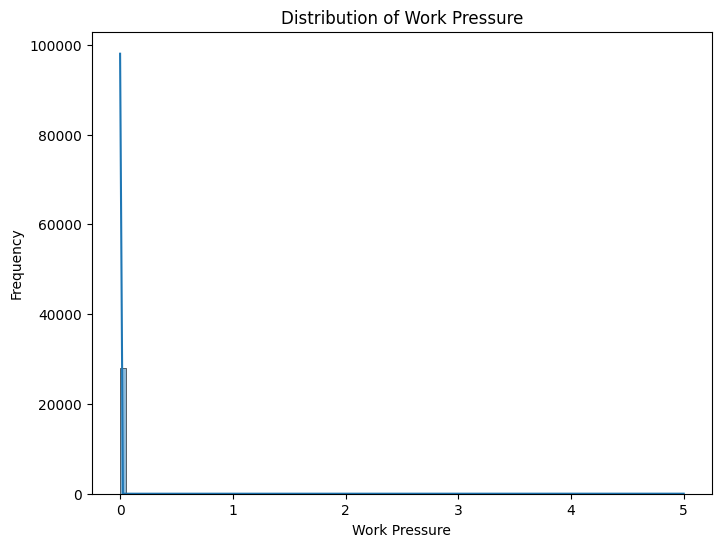

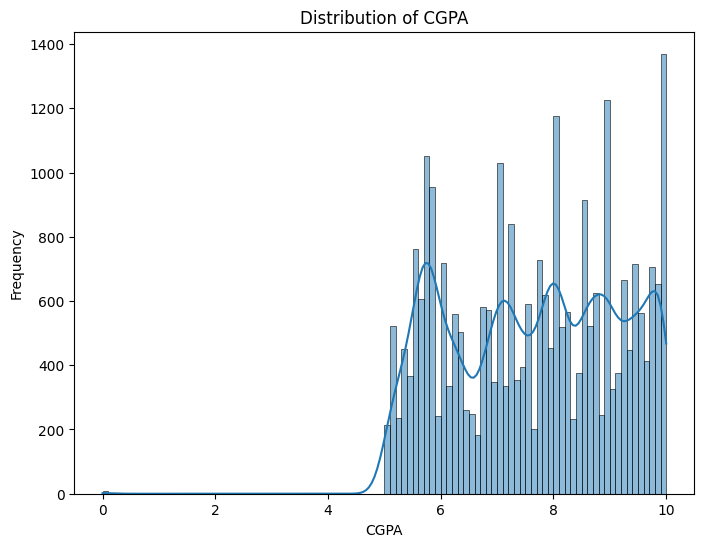

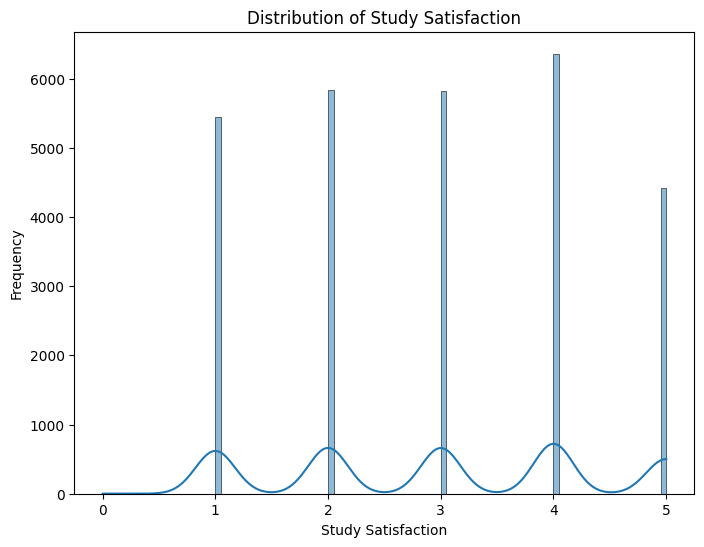

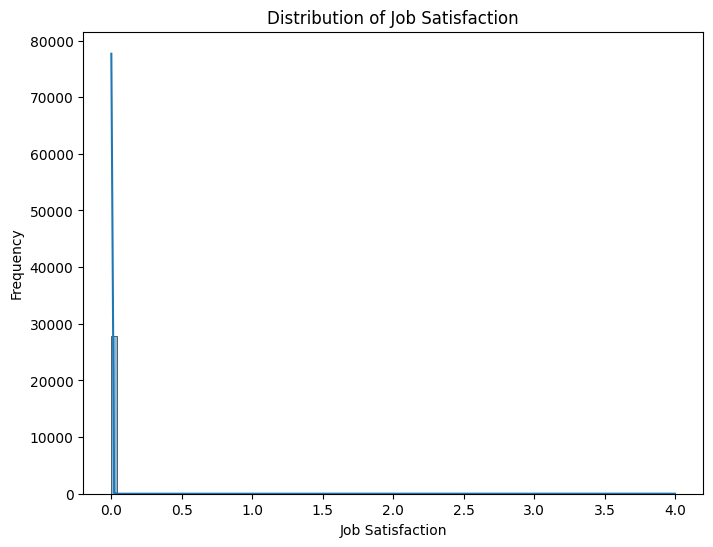

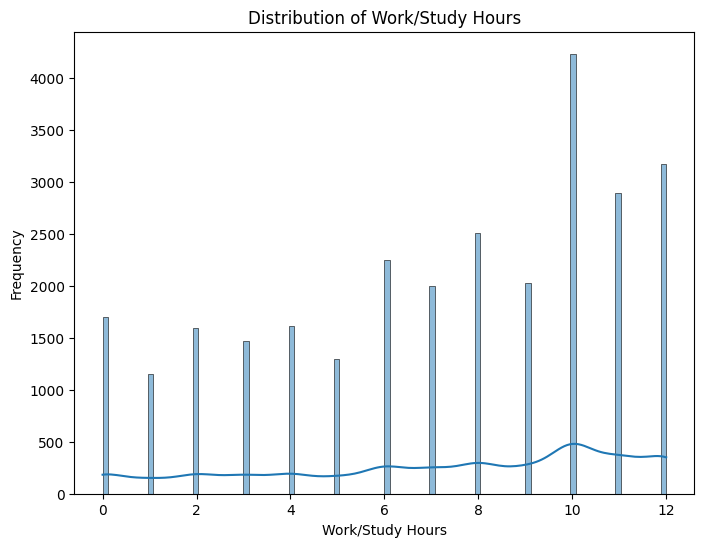

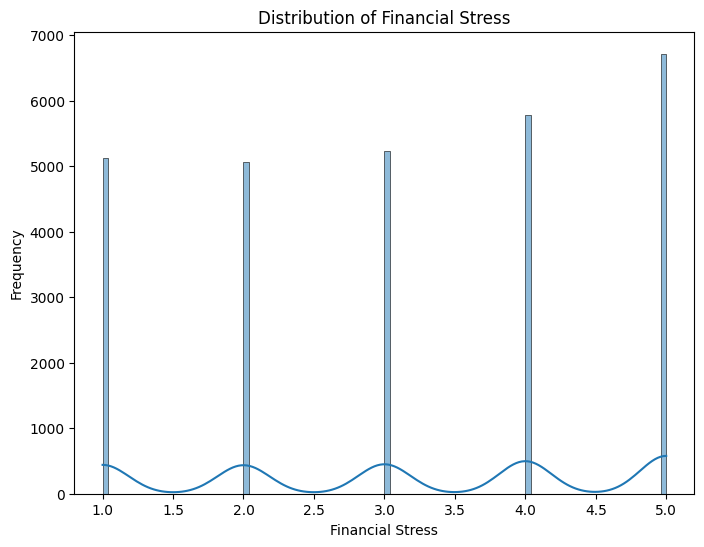

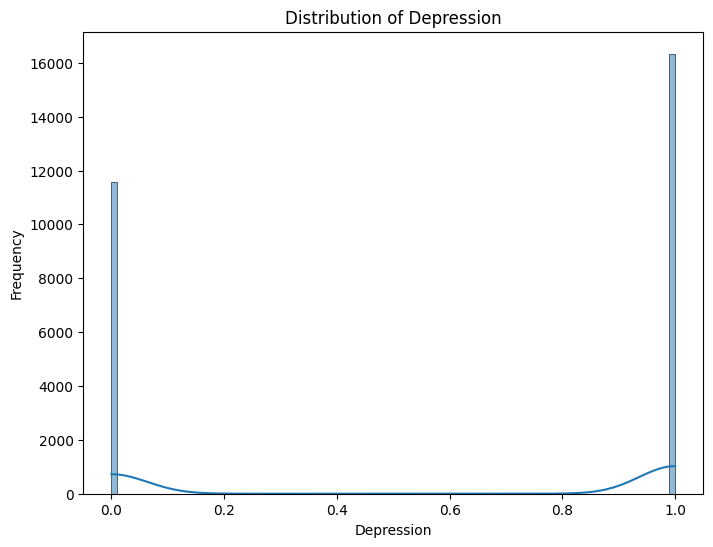

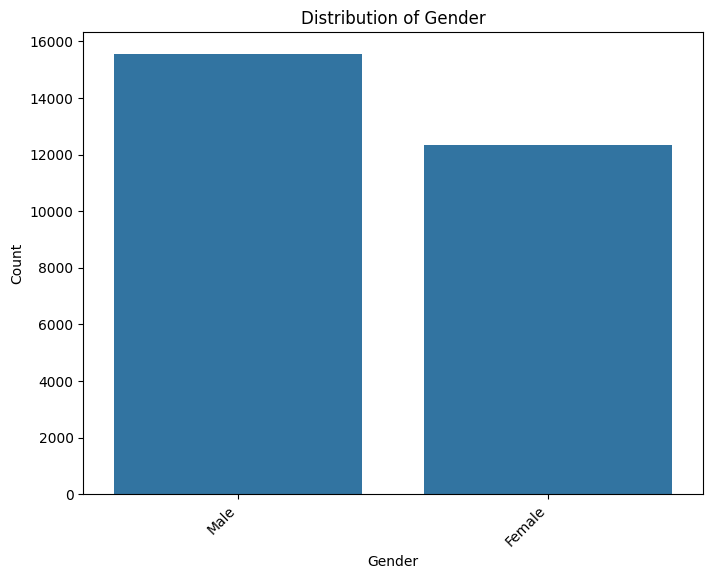

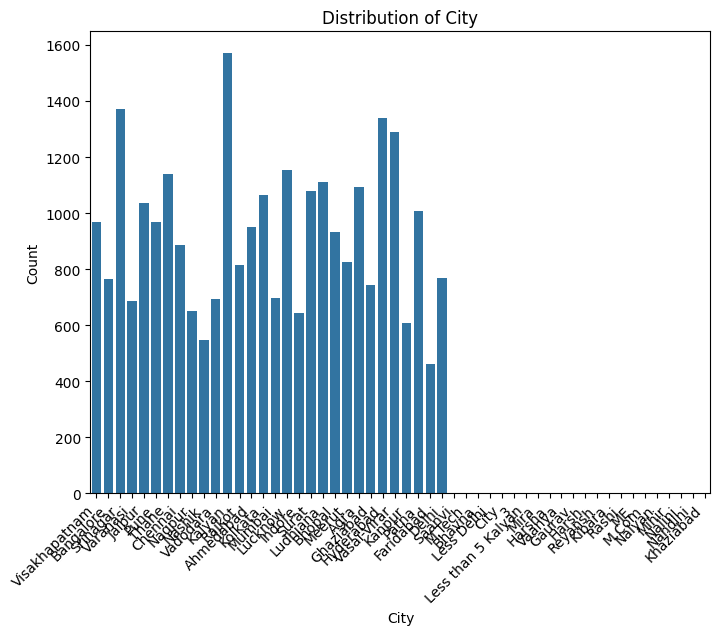

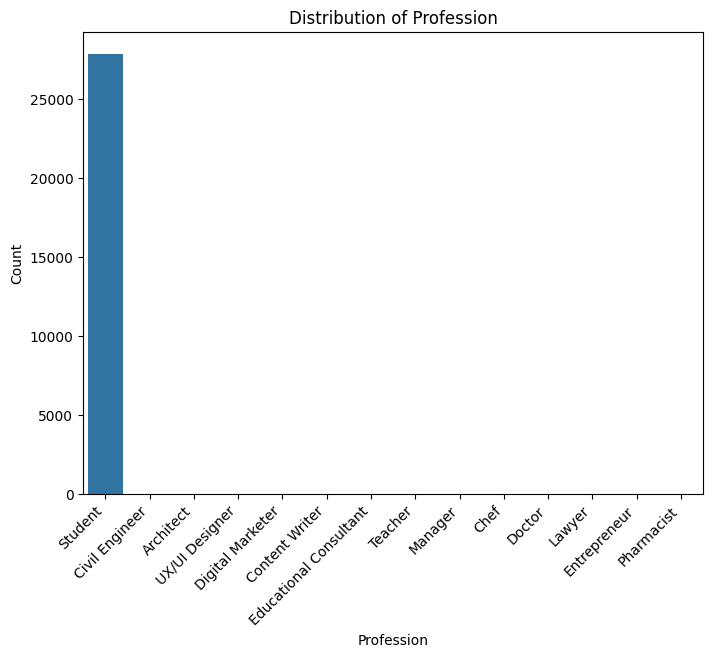

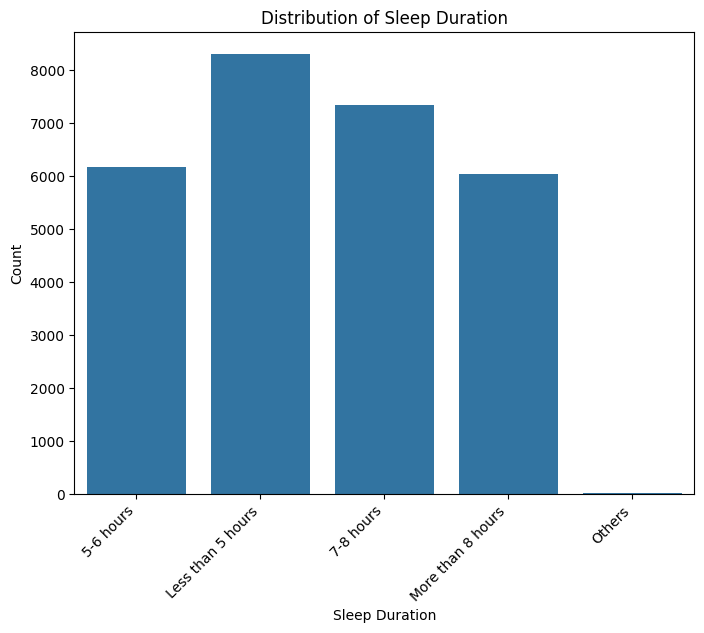

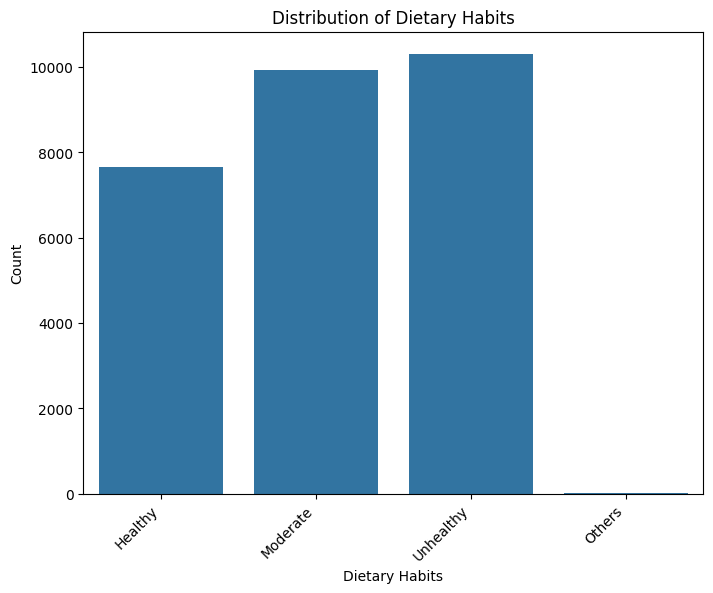

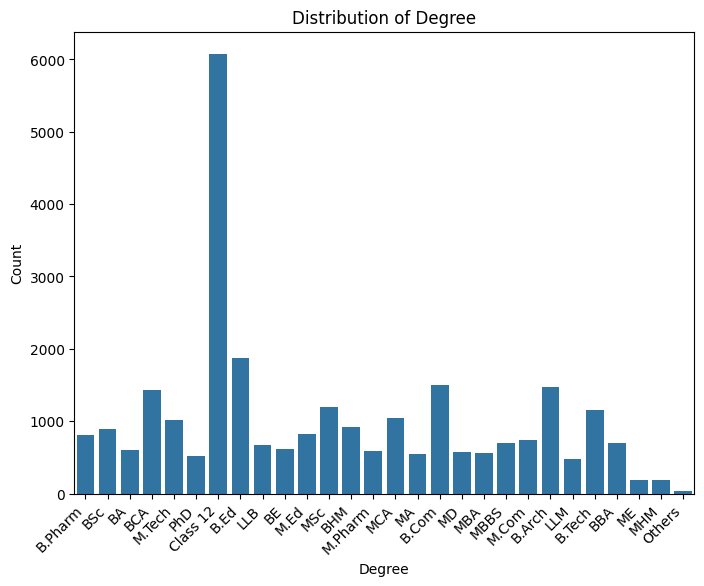

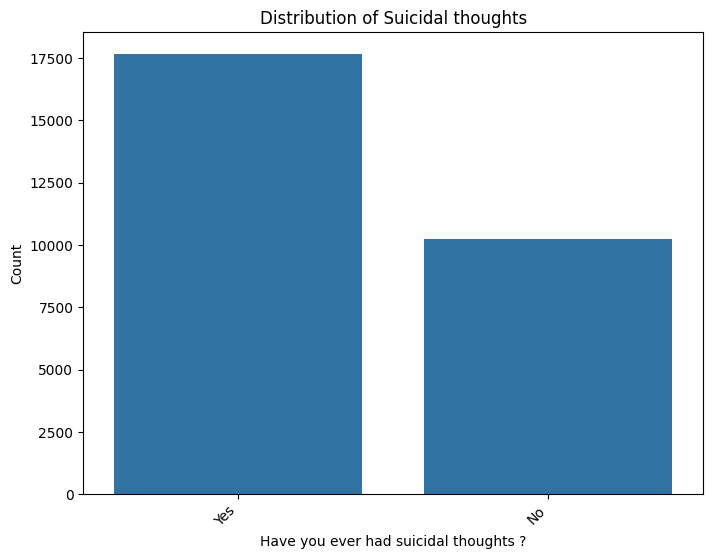

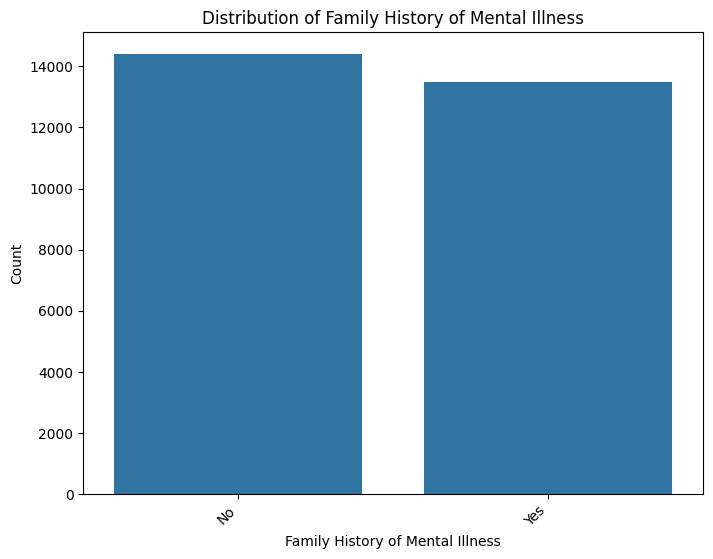

In [ ]:
# Plot distributions of numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 6))

    if col == 'Age' or 'CGPA':
        sns.histplot(df[col], kde=True, bins=100)
    elif col in ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Depression']:
        sns.histplot(df[col], kde=True, bins=5)
    elif col == 'Work/Study Hours':
        sns.histplot(df[col], kde=True, bins=12)
    elif col == 'Financial Stress':
        sns.histplot(df[col], kde=True, bins=5)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Analyze categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    if col == 'Have you ever had suicidal thoughts ?':
        plt.title(f'Distribution of Suicidal thoughts')
    else:
      plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

##Check for Outliers:
Use boxplots to detect potential outliers.

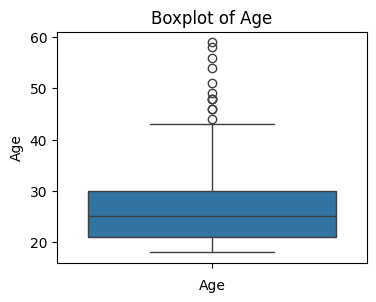

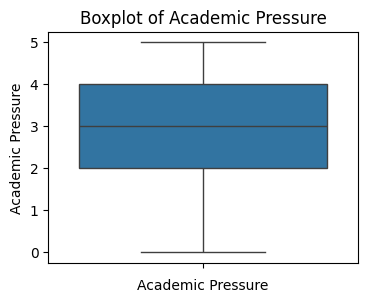

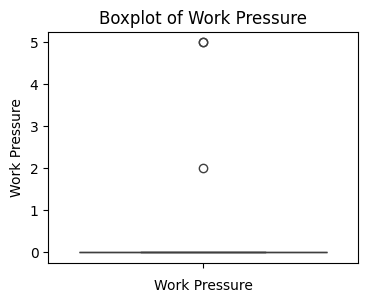

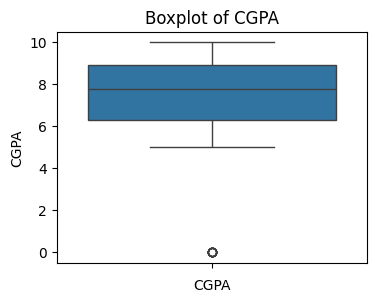

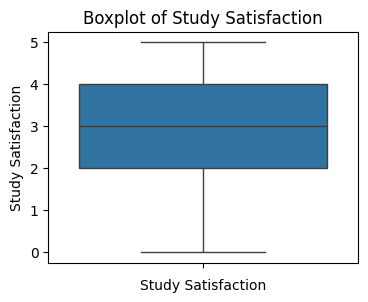

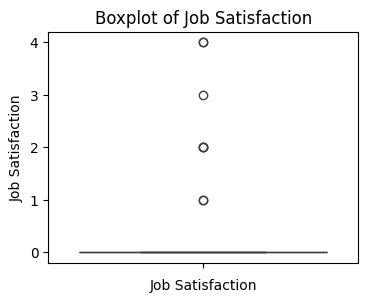

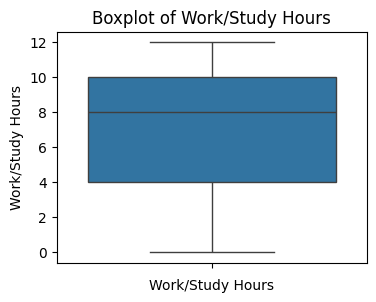

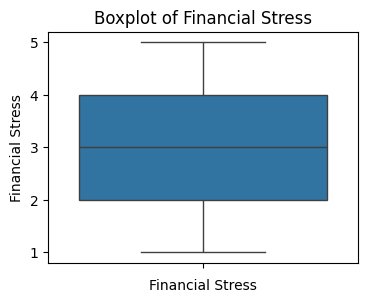

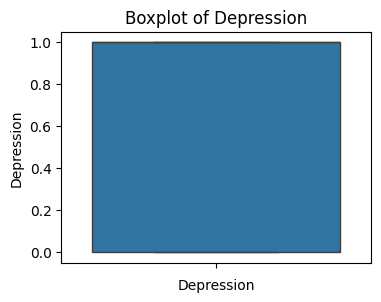

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

##Correlation Analysis:
Explore relationships between numerical variables.

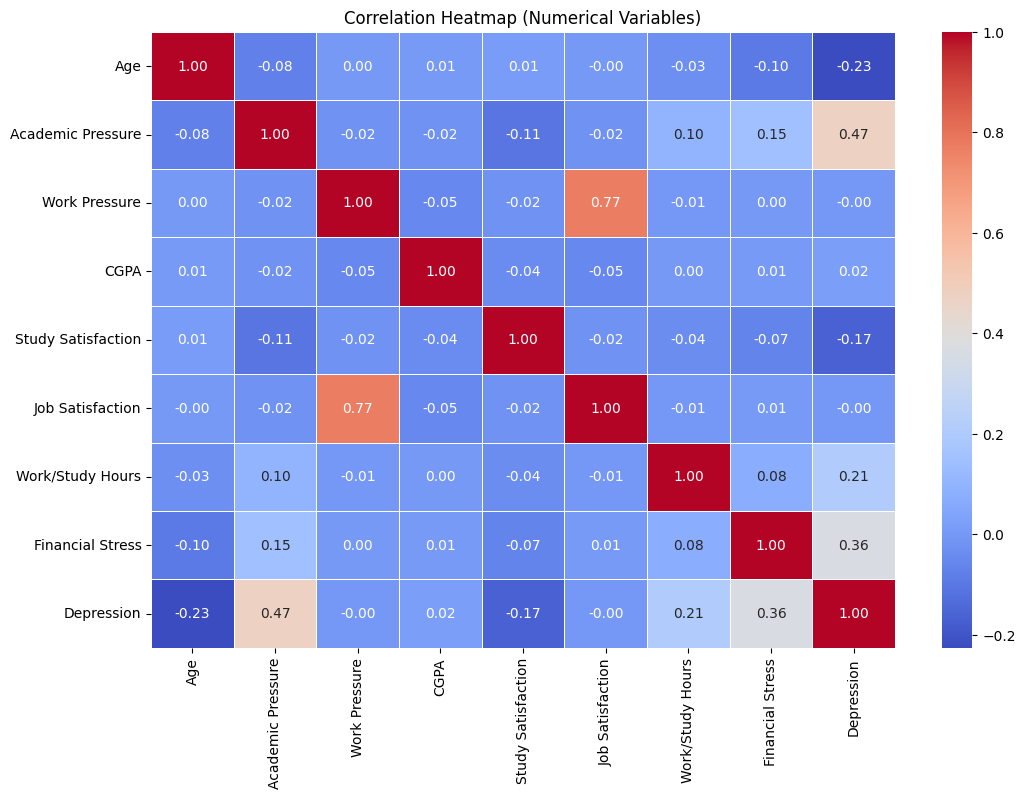

In [ ]:
# Select only numerical columns from the dataframe
df_numerical = df[numerical_cols]

# Compute the correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

#Data Cleaning and Feature Engineering

##Handle Missing Values
There are 3 null values in Financial Stress column.
Since 3 rows is only ~0.01% of the dataset, dropping them would not significantly affect the data size or quality.



In [ ]:
df.dropna(subset=['Financial Stress'], inplace=True)

In [ ]:
df.shape

(27898, 18)

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  int64  
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  int64  
 6   Work Pressure                          27898 non-null  int64  
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  int64  
 9   Job Satisfaction                       27898 non-null  int64  
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,40642.015063,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35040.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70689.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105824.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


##Remove Unrelated Rows
As the project aims to study students only, we need to remove rows where profession is not equal to student.

In [ ]:
df = df[df['Profession'] == 'Student']

In [ ]:
df.shape

(27867, 18)

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27867 non-null  int64  
 1   Gender                                 27867 non-null  object 
 2   Age                                    27867 non-null  int64  
 3   City                                   27867 non-null  object 
 4   Profession                             27867 non-null  object 
 5   Academic Pressure                      27867 non-null  int64  
 6   Work Pressure                          27867 non-null  int64  
 7   CGPA                                   27867 non-null  float64
 8   Study Satisfaction                     27867 non-null  int64  
 9   Job Satisfaction                       27867 non-null  int64  
 10  Sleep Duration                         27867 non-null  object 
 11  Dietary

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,70439.987189,25.821007,3.140740,0.000431,7.656084,2.943697,0.000682,7.157534,3.139520,0.585172
std,40633.999681,4.906538,1.381637,0.044019,1.470836,1.361183,0.044421,3.707136,1.437289,0.492701
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35057.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70659.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105816.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


##Remove Unimportant Features
- id field will not have impact on the modeling and anallysis.
- While geographical location may have an indirect effect on factors like stress, lifestyle, or access to mental health resources, the specific city a student lives in is unlikely to be directly correlated with depression. In most cases, the socioeconomic factors tied to living in a city may have more relevance, but the specific city might not.
- Also, as all Profession values are now Student, this feature could add noise to the dataset and unnecessarily increase the size of feature matrix.
- While the Work Pressure and Job Satisfaction values are ubbalanced, almost all values are zeros, we can drop these features to keep data and model efficency.
- Finally, The degree type might not have a direct connection to depression levels. While academic pressure from degree demands could be a factor, the degree type itself might not provide significant differentiation for depression. The level of academic pressure and workload, on the other hand, is more relevant.

In [ ]:
df = df.drop(['id'], axis=1)
df = df.drop(['City'], axis=1)
df = df.drop(['Profession'], axis=1)
df = df.drop(['Work Pressure'], axis=1)
df = df.drop(['Job Satisfaction'], axis=1)
df = df.drop(['Degree'], axis=1)

In [ ]:
categorical_cols.remove('City')
categorical_cols.remove('Profession')
numerical_cols.remove('Work Pressure')
numerical_cols.remove('Job Satisfaction')
categorical_cols.remove('Degree')

In [ ]:
print(numerical_cols)
print(categorical_cols)

['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [ ]:
df.shape

(27867, 12)

In [ ]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,5,8.97,2,5-6 hours,Healthy,Yes,3,1.0,No,1
1,Female,24,2,5.90,5,5-6 hours,Moderate,No,3,2.0,Yes,0
2,Male,31,3,7.03,5,Less than 5 hours,Healthy,No,9,1.0,Yes,0
3,Female,28,3,5.59,2,7-8 hours,Moderate,Yes,4,5.0,Yes,1
4,Female,25,4,8.13,3,5-6 hours,Moderate,Yes,1,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27867 non-null  object 
 1   Age                                    27867 non-null  int64  
 2   Academic Pressure                      27867 non-null  int64  
 3   CGPA                                   27867 non-null  float64
 4   Study Satisfaction                     27867 non-null  int64  
 5   Sleep Duration                         27867 non-null  object 
 6   Dietary Habits                         27867 non-null  object 
 7   Have you ever had suicidal thoughts ?  27867 non-null  object 
 8   Work/Study Hours                       27867 non-null  int64  
 9   Financial Stress                       27867 non-null  float64
 10  Family History of Mental Illness       27867 non-null  object 
 11  Depress

In [ ]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,25.821007,3.140740,7.656084,2.943697,7.157534,3.139520,0.585172
std,4.906538,1.381637,1.470836,1.361183,3.707136,1.437289,0.492701
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


##Convert Age into Age Groups
Since Age is a continuous variable and falls into the typical range for students, we consider binning it into meaningful categories. This can help capture group patterns and may improve model interpretability. Specially when we check the outliers in the boxplot of Age.

In [ ]:
# Define binning ranges and labels for Age groups
bins = [18, 24, 29, 34, 39, 60]  # Age groups
labels = ['18-24', '25-29', '30-34', '35-39', '40-60']  # Age group labels

# Bin the 'Age' column and replace it with the corresponding Age group
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Rename the column 'Age' to 'Age Group'
df.rename(columns={'Age': 'Age Group'}, inplace=True)

In [ ]:
numerical_cols.remove('Age')
categorical_cols.insert(1, 'Age Group')

In [ ]:
print(numerical_cols)
print(categorical_cols)

['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
['Gender', 'Age Group', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [ ]:
df.head()

,Gender,Age Group,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,30-34,5,8.97,2,5-6 hours,Healthy,Yes,3,1.0,No,1
1,Female,25-29,2,5.90,5,5-6 hours,Moderate,No,3,2.0,Yes,0
2,Male,30-34,3,7.03,5,Less than 5 hours,Healthy,No,9,1.0,Yes,0
3,Female,25-29,3,5.59,2,7-8 hours,Moderate,Yes,4,5.0,Yes,1
4,Female,25-29,4,8.13,3,5-6 hours,Moderate,Yes,1,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27867 non-null  object  
 1   Age Group                              27867 non-null  category
 2   Academic Pressure                      27867 non-null  int64   
 3   CGPA                                   27867 non-null  float64 
 4   Study Satisfaction                     27867 non-null  int64   
 5   Sleep Duration                         27867 non-null  object  
 6   Dietary Habits                         27867 non-null  object  
 7   Have you ever had suicidal thoughts ?  27867 non-null  object  
 8   Work/Study Hours                       27867 non-null  int64   
 9   Financial Stress                       27867 non-null  float64 
 10  Family History of Mental Illness       27867 non-null  object  

In [ ]:
df.describe()

,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,3.140740,7.656084,2.943697,7.157534,3.139520,0.585172
std,1.381637,1.470836,1.361183,3.707136,1.437289,0.492701
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


##Convert CGPA into CGPA Groups
Converting CGPA into groups simplifies the feature, reduces the impact of extreme values, and makes it easier for the model to learn patterns based on categorical ranges rather than continuous data, improving model interpretability and stability.

In [ ]:
# Define the static groups for CGPA
cgpa_groups = {
    'Low CGPA': (0, 5),               # 0 to 5 (inclusive)
    'Below Average CGPA': (5, 6.5),   # 5 to 6.5 (inclusive 5, exclusive 6.5)
    'Average CGPA': (6.5, 8),         # 6.5 to 8 (inclusive 6.5, exclusive 8)
    'High CGPA': (8, 10.01)           # 8 to 10 (inclusive)
}

# Function to map CGPA into defined groups
def map_cgpa_to_group(cgpa):
    for group, (low, high) in cgpa_groups.items():
        if low <= cgpa < high:
            return group
    return 'Unknown'  # For any value outside the defined range

# Apply the function to the 'CGPA' column
df['CGPA'] = df['CGPA'].apply(map_cgpa_to_group)

# Rename the column 'CGPA' to 'CGPA Group'
df.rename(columns={'CGPA': 'CGPA Group'}, inplace=True)

In [ ]:
numerical_cols.remove('CGPA')
categorical_cols.insert(2, 'CGPA Group')

In [ ]:
print(numerical_cols)
print(categorical_cols)

['Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
['Gender', 'Age Group', 'CGPA Group', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [ ]:
df.head()

,Gender,Age Group,Academic Pressure,CGPA Group,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,30-34,5,High CGPA,2,5-6 hours,Healthy,Yes,3,1.0,No,1
1,Female,25-29,2,Below Average CGPA,5,5-6 hours,Moderate,No,3,2.0,Yes,0
2,Male,30-34,3,Average CGPA,5,Less than 5 hours,Healthy,No,9,1.0,Yes,0
3,Female,25-29,3,Below Average CGPA,2,7-8 hours,Moderate,Yes,4,5.0,Yes,1
4,Female,25-29,4,High CGPA,3,5-6 hours,Moderate,Yes,1,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27867 non-null  object  
 1   Age Group                              27867 non-null  category
 2   Academic Pressure                      27867 non-null  int64   
 3   CGPA Group                             27867 non-null  object  
 4   Study Satisfaction                     27867 non-null  int64   
 5   Sleep Duration                         27867 non-null  object  
 6   Dietary Habits                         27867 non-null  object  
 7   Have you ever had suicidal thoughts ?  27867 non-null  object  
 8   Work/Study Hours                       27867 non-null  int64   
 9   Financial Stress                       27867 non-null  float64 
 10  Family History of Mental Illness       27867 non-null  object  

In [ ]:
df.describe()

,Academic Pressure,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,3.140740,2.943697,7.157534,3.139520,0.585172
std,1.381637,1.361183,3.707136,1.437289,0.492701
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,4.000000,2.000000,0.000000
50%,3.000000,3.000000,8.000000,3.000000,1.000000
75%,4.000000,4.000000,10.000000,4.000000,1.000000
max,5.000000,5.000000,12.000000,5.000000,1.000000


##Encode Categorical Variables

In [ ]:
# Map values in 'Gender' column: Male -> 0, Female -> 1
df['Gender'] = df['Gender'].map(gender_map)

# Map the age groups to numerical values
df['Age Group'] = df['Age Group'].map(age_group_map)
df['Age Group'] = df['Age Group'].astype('category').cat.codes

# Map the CGPA groups to numerical values
df['CGPA Group'] = df['CGPA Group'].map(cgpa_map)
df['CGPA Group'] = df['CGPA Group'].astype('category').cat.codes

# Map values in 'Sleep Duration' column to numerical values
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_map)

# Map values in 'Dietary Habits' column: Healthy -> 0, Moderate -> 1, Unhealthy -> 2, Other -> 3
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits_map)

# Map values in 'Have you ever had suicidal thoughts ?' column: Yes -> 1, No -> 0
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(yes_no_map)

# Map values in 'Family History of Mental Illness' column: Yes -> 1, No -> 0
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(yes_no_map)

In [ ]:
df.head()

,Gender,Age Group,Academic Pressure,CGPA Group,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,2,5,3,2,1,0,1,3,1.0,0,1
1,1,1,2,1,5,1,1,0,3,2.0,1,0
2,0,2,3,2,5,0,0,0,9,1.0,1,0
3,1,1,3,1,2,2,1,1,4,5.0,1,1
4,1,1,4,3,3,1,1,1,1,1.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27867 non-null  int64  
 1   Age Group                              27867 non-null  int8   
 2   Academic Pressure                      27867 non-null  int64  
 3   CGPA Group                             27867 non-null  int8   
 4   Study Satisfaction                     27867 non-null  int64  
 5   Sleep Duration                         27867 non-null  int64  
 6   Dietary Habits                         27867 non-null  int64  
 7   Have you ever had suicidal thoughts ?  27867 non-null  int64  
 8   Work/Study Hours                       27867 non-null  int64  
 9   Financial Stress                       27867 non-null  float64
 10  Family History of Mental Illness       27867 non-null  int64  
 11  Depress

In [ ]:
df.describe()

,Gender,Age Group,Academic Pressure,CGPA Group,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,0.442782,1.029174,3.140740,2.173216,2.943697,1.400438,1.096709,0.632684,7.157534,3.139520,0.483870,0.585172
std,0.496724,0.922639,1.381637,0.838603,1.361183,1.128259,0.797712,0.482082,3.707136,1.437289,0.499749,0.492701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,4.000000,5.000000,3.000000,5.000000,4.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.000000


#Post-Engineering Exploratory Data Analysis (EDA)
Analyze the dataset after Engineering

##Explore Data Distributions:

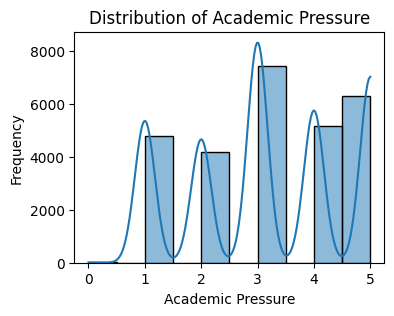

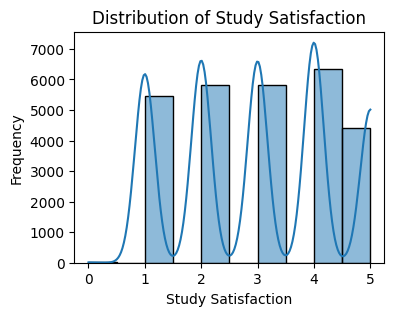

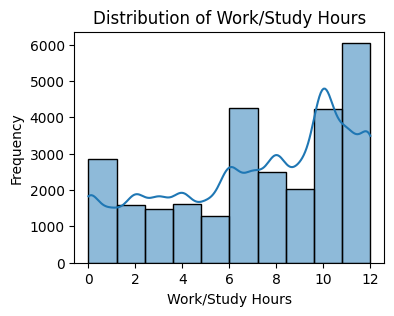

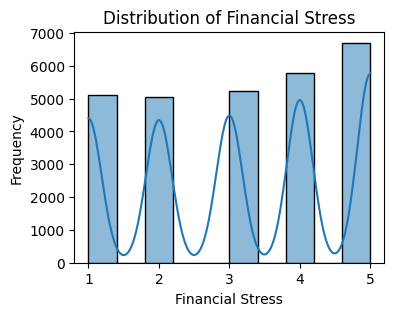

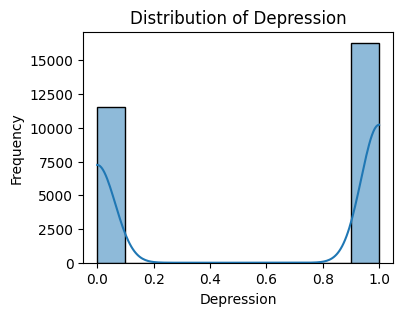

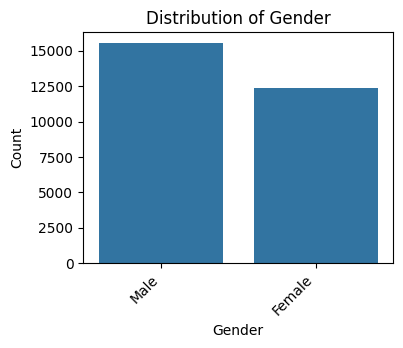

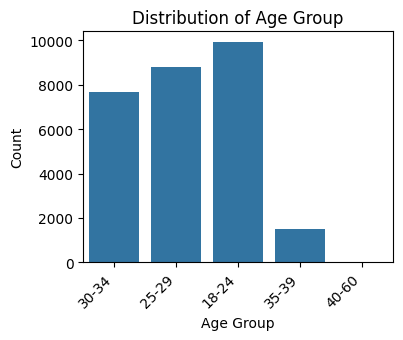

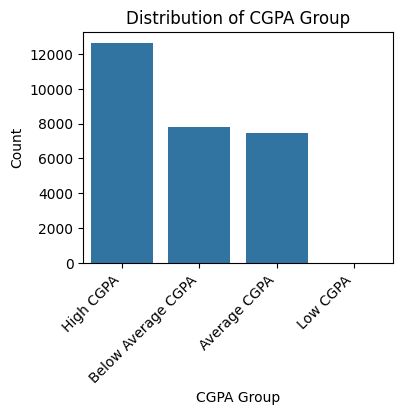

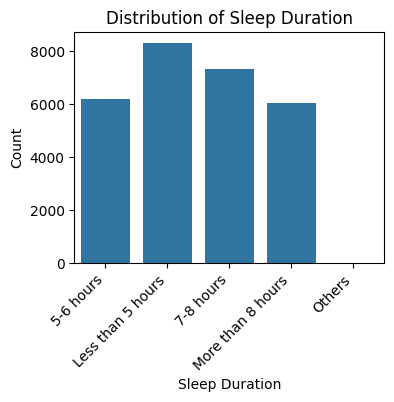

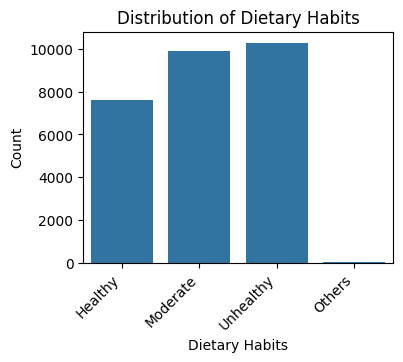

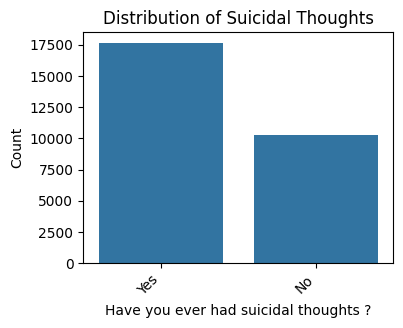

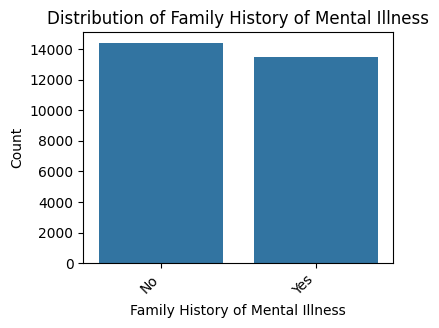

In [ ]:
# Plot distributions of numerical variables
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Reverse mappings for visualization
reverse_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Age Group': {0: '18-24', 1: '25-29', 2: '30-34', 3: '35-39', 4: '40-60'},
    'CGPA Group': {0: 'Low CGPA', 1: 'Below Average CGPA', 2: 'Average CGPA', 3: 'High CGPA'},
    'Sleep Duration': {0: 'Less than 5 hours', 1: '5-6 hours', 2: '7-8 hours', 3: 'More than 8 hours', 4: 'Others'},
    'Dietary Habits': {0: 'Healthy', 1: 'Moderate', 2: 'Unhealthy', 3: 'Others'},
    'Have you ever had suicidal thoughts ?': {1: 'Yes', 0: 'No'},
    'Family History of Mental Illness': {1: 'Yes', 0: 'No'}
}

# Analyze categorical variables
for col in categorical_cols:
    plt.figure(figsize=(4, 3))

    # Replace numerical values with original categories for visualization
    if col in reverse_mappings:
        temp_df = df.copy()
        temp_df[col] = temp_df[col].map(reverse_mappings[col])
        sns.countplot(x=col, data=temp_df)
    else:
        sns.countplot(x=col, data=df)

    # Customize title for suicidal thoughts
    if col == 'Have you ever had suicidal thoughts ?':
        plt.title('Distribution of Suicidal Thoughts')
    else:
        plt.title(f'Distribution of {col}')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

##Check for Outliers:
Use boxplots to detect potential outliers.

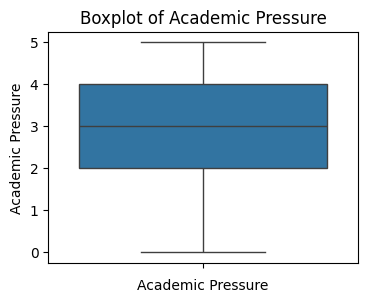

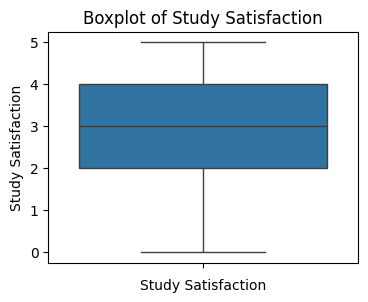

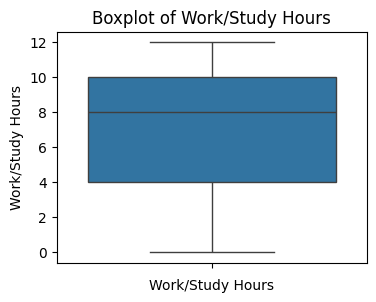

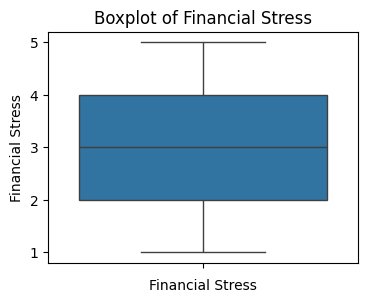

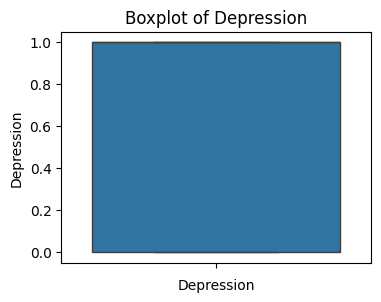

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

##Correlation Analysis:
Explore relationships between numerical variables.

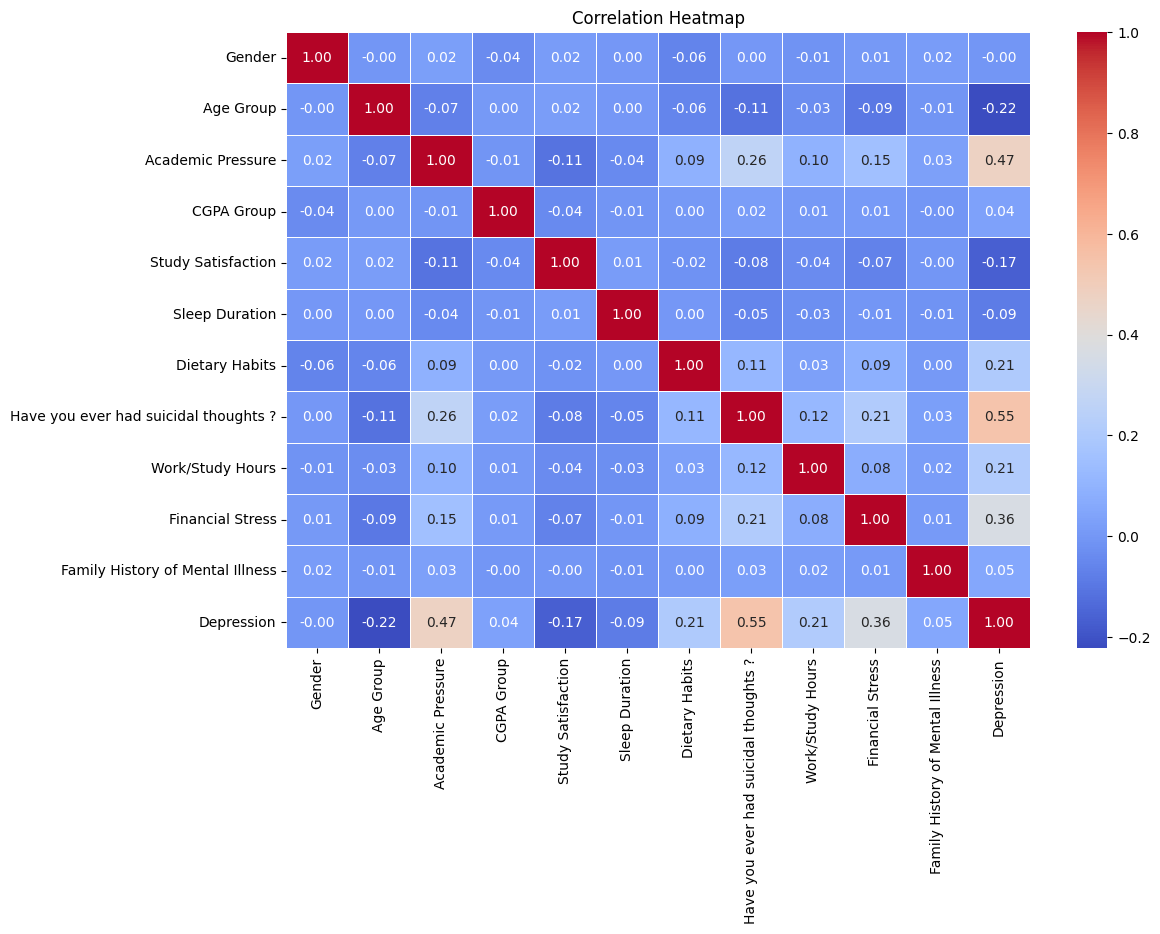

In [ ]:
# Compute the correlation matrix for all columns (numerical and categorical after encoding)
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Modeling

##Data Splitting

In [ ]:
X = df[['Gender', 'Age Group', 'Academic Pressure', 'CGPA Group', 'Study Satisfaction', 'Sleep Duration',
                     'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress',
                     'Family History of Mental Illness']]
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Training

###Base Models  
We define a list of base models (`LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier` and `SVC` with `probability=True` to enable soft voting).

In [ ]:
# Define models separately for easier access
base_models = [
    ('logreg', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True))
]

# Train each base model and save
for name, model in base_models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='binary')  # For binary classification
    print(name ," F1 Score: ", f1)
    # Save the trained model
    joblib.dump(model, f'{name}_model.joblib')

logreg  F1 Score:  0.8766961651917404
decision_tree  F1 Score:  0.8017435743273711
rf  F1 Score:  0.8629893238434164
svm  F1 Score:  0.876981796829125


###Final Voting Classifier  
We combine all base models into a final **Soft Voting Classifier**.



In [ ]:
base_models = [
    ('logreg', joblib.load('logreg_model.joblib')),
    ('decision_tree', joblib.load('decision_tree_model.joblib')),
    ('rf', joblib.load('rf_model.joblib')),
    ('svm', joblib.load('svm_model.joblib'))
]
# Now create the final Voting Classifier combining all pre-trained base models
final_voting_clf = VotingClassifier(estimators=base_models, voting='soft')
# Train the final Voting Classifier
final_voting_clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = final_voting_clf.predict(X_test)
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print("Final Voting Classifier F1 Score: ", f1)
# Save the final Voting Classifier
joblib.dump(final_voting_clf, 'final_voting_clf.joblib')

Final Voting Classifier F1 Score:  0.8619160260201064


['final_voting_clf.joblib']

##Final Voting Classifier Model Download to Google Drive
Saving the `.joblib` file of final model for persistent storage.

In [ ]:
# Mount Google Drive to access it
print("\nSaving to Google Drive...")
drive.mount('/content/drive')  # Mount Google Drive

# Define output directory on Google Drive
output_dir = '/content/drive/My Drive/StudentDepressionModel/'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save the model to Google Drive
joblib.dump(final_voting_clf, os.path.join(output_dir, 'final_voting_clf.joblib'))

print(f"Model saved to {output_dir}final_voting_clf.joblib.")


Saving to Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/My Drive/StudentDepressionModel/final_voting_clf.joblib.


##Performance Evaluation and Training Results  
We evaluate the performance of this combined classifier using cross-validation, printing the mean F1 score.

In [ ]:
# Load the pre-trained Final Voting classifier
final_voting_clf = joblib.load('final_voting_clf.joblib')

#Use StratifiedKFold for balanced cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation
score = cross_val_score(final_voting_clf, X_train, y_train, cv=cv, scoring='f1')
print(f"Final Voting Classifier: Mean F1 Score = {score.mean():.4f}")

Final Voting Classifier: Mean F1 Score = 0.8564


##Advantages of this combined model

- **Diversity**: The use of voting classifier with different base models adds diversity to the ensemble.
- **Final Ensemble**: The final Voting Classifier combines all base models, offering a potentially higher-performing model.

This approach provides a high level of flexibility and can result in improved model performance by leveraging the strengths of multiple ensemble strategies.

#Visualization

##Loading the Trained Model

In [ ]:
# Reload the final voting clf model
drive.mount('/content/drive')
final_voting_clf = joblib.load('/content/drive/My Drive/StudentDepressionModel/final_voting_clf.joblib')

print("Model loaded successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully!


##Model Performance Visualizations

###Confusion Matrix
Purpose: Understand the true positives, false positives, true negatives, and false negatives.

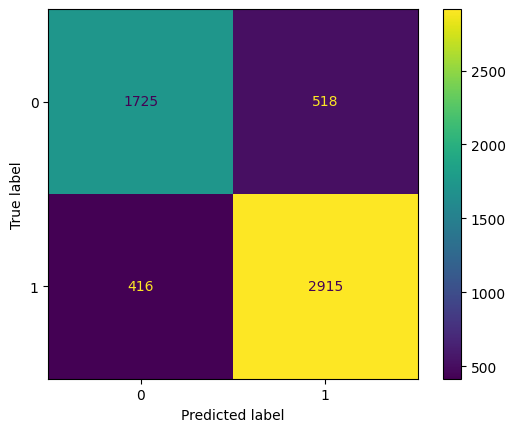

In [ ]:
# Assuming `final_model` is your trained model and `X_test`, `y_test` are the test data
y_pred = final_voting_clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(final_voting_clf, X_test, y_test)
plt.show()

###ROC Curve and AUC
Purpose: Evaluate the trade-off between true positive rate (TPR) and false positive rate (FPR) for binary classification.

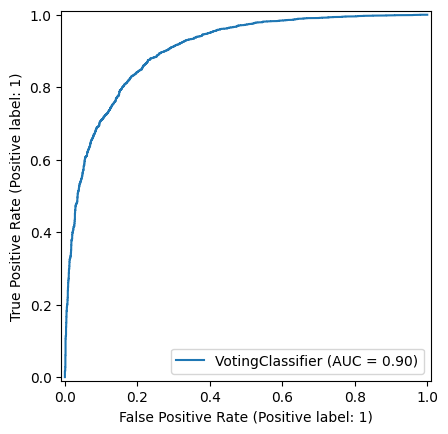

In [ ]:
RocCurveDisplay.from_estimator(final_voting_clf, X_test, y_test)
plt.show()

###Precision-Recall Curve
Purpose: Understand the balance between precision and recall, especially for imbalanced datasets.

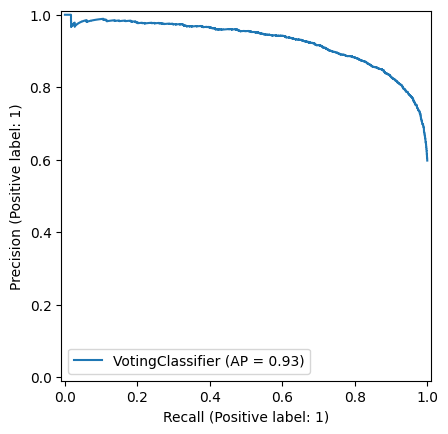

In [ ]:
PrecisionRecallDisplay.from_estimator(final_voting_clf, X_test, y_test)
plt.show()

###Learning Curve
Purpose: Assess whether your model is underfitting or overfitting as a function of training size.

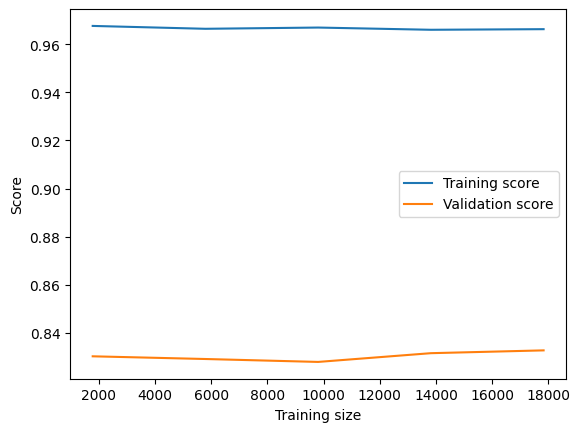

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(final_voting_clf, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend()
plt.show()

##Feature Importance Visualizations

###Feature Importance (Tree-based Models)
Purpose: Identify which features are most important in decision-making.


Model svm does not support feature importances or coefficients.


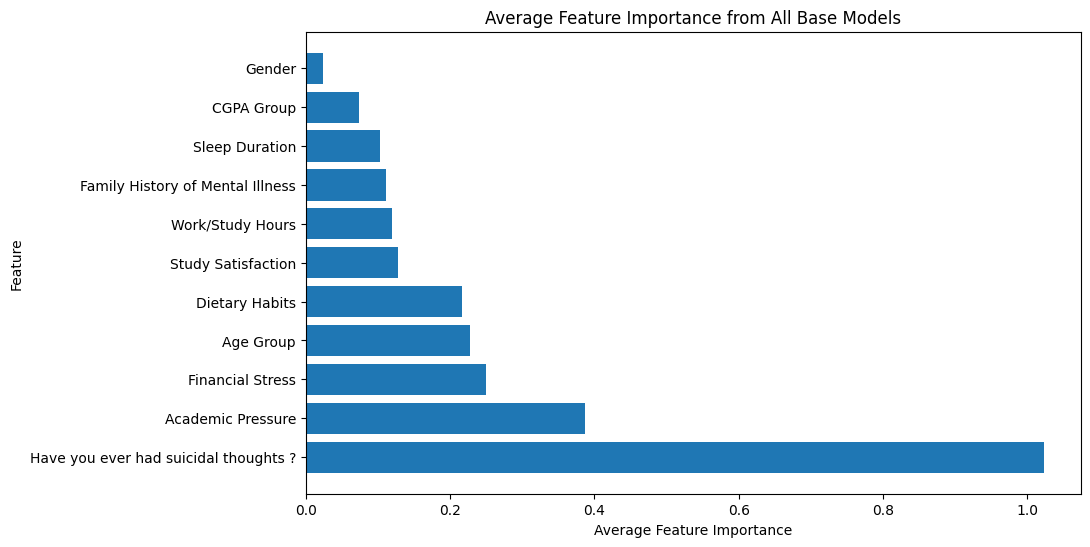

In [ ]:
# Load the pre-trained models
models = [
    ('logreg', joblib.load('logreg_model.joblib')),
    ('decision_tree', joblib.load('decision_tree_model.joblib')),
    ('rf', joblib.load('rf_model.joblib')),
    ('svm', joblib.load('svm_model.joblib'))
]

# Assuming X_train is your training data (DataFrame), which contains the feature names
feature_names = X_train.columns

# List to store the feature importances for each model
importances = {}

# Iterate over the models to extract feature importances
for name, model in models:
    if hasattr(model, 'feature_importances_'):  # DecisionTree and RandomForest have this attribute
        importances[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):  # LogisticRegression has 'coef_' for feature importance (weights)
        importances[name] = np.abs(model.coef_[0])  # Take the absolute value of the coefficients
    else:
        print(f"Model {name} does not support feature importances or coefficients.")

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names})

# Add the feature importances for each model to the DataFrame
for name, importance in importances.items():
    importance_df[name] = importance

# Sort the DataFrame based on the importance of features (sum across all models)
importance_df['Average_Importance'] = importance_df[importances.keys()].mean(axis=1)
importance_df = importance_df.sort_values(by='Average_Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Average_Importance'])
plt.xlabel('Average Feature Importance')
plt.ylabel('Feature')
plt.title('Average Feature Importance from All Base Models')
plt.show()

##Decision Boundary Visualizations
Purpose: Visualize how a model separates different classes in the feature space (works best for 2D or PCA-reduced data).

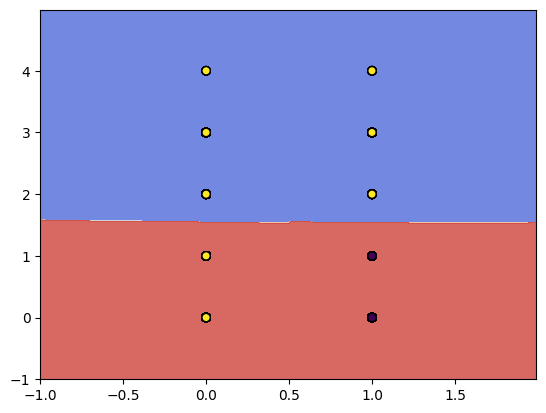

In [ ]:
# Assuming two features for simplicity
X_plot = X_train.iloc[:, :2]
model = final_voting_clf # Use the final voting classifier
model.fit(X_plot, y_train)
x1, x2 = np.meshgrid(np.arange(X_plot.iloc[:, 0].min() - 1, X_plot.iloc[:, 0].max() + 1, 0.01),
                     np.arange(X_plot.iloc[:, 1].min() - 1, X_plot.iloc[:, 1].max() + 1, 0.01))
Z = model.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1], c=y_train, edgecolor='k')
plt.show()

##Residual Analysis
Purpose: For regression tasks, analyze the residuals (difference between predicted and actual values).

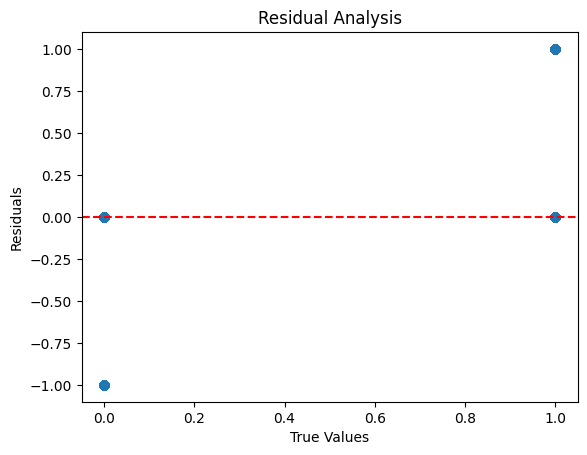

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

##Model Comparison
Purpose: Compare the performance of multiple models.

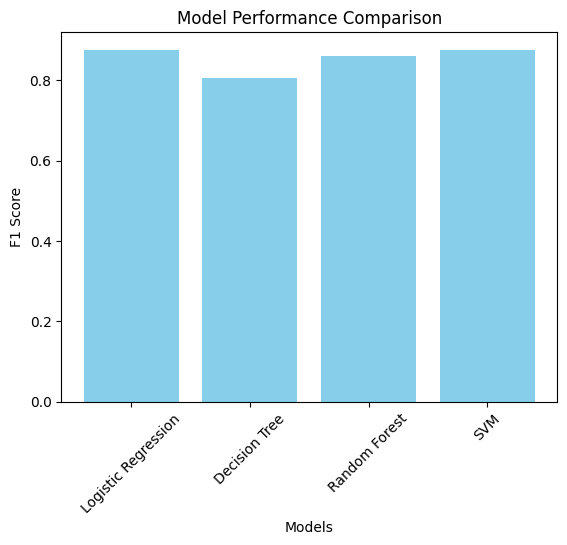

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
f1_scores = [0.876, 0.807, 0.860, 0.876]

plt.bar(model_names, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

**Interpretation and Recommendations**

**Interpreting the results using the 4 models used**:

*   Logistic Regression:
      This model has a high F1 score, slightly below the highest performers, indicating strong overall performance in balancing precision and recall.

*   Decision Tree:
      This model has the lowest F1 score among the four, suggesting it may not handle the classification task as effectively as the other models.


*   Random Forest:
      This model achieves one of the highest F1 scores, demonstrating excellent performance and indicating its robustness in handling the classification task, possibly due to its ensemble nature.

*   Support Vector Machine (SVM):
      The SVM also performs very well, matching or slightly surpassing the performance of the Random Forest, which highlights its effectiveness in this task.



**Key Factors Influencing Depression**


1.   "Have you ever had suicidal thoughts?" has the highest importance    significantly more than any other feature, indicating that it is a strong predictor or influential variable.

2.   Academic Pressure is the second most important factor, showing its strong relevance in the model.
3. Other factors like Financial Stress, Age Group, and Dietary Habits have moderate importance.
4. Factors such as Gender and CGPA Group have minimal importance, suggesting they contribute very little to the model's predictions.




**Actionable Insights**

According to the study it's crucial to take proactive and reactive actions to overcome student depression, so we may suggest:



1.   Immediate Access to Counseling:

      *   Provide confidential and immediate psychological support for students in distress.

      *   Train counselors to handle crisis situations, including suicidal ideation.



2.   Crisis Helplines:

      *   Promote 24/7 mental health hotlines for students to access help in emergencies.


3. Building Support Networks:

      *   Encourage peer-support groups and mentorship programs.

      * Foster connections between students and trusted adults or counselors.



4. Promoting Healthy Lifestyles:

      * Organize wellness programs focusing on physical and mental health.



5. Parental and Teacher Training:

     *  Train parents and teachers to identify early warning signs of mental health issues.
     
     *   Advocate for sufficient sleep, regular exercise, and balanced nutrition.


6. Reduce Financial Stress:

     *   Offer financial aid, scholarships, and workshops on managing personal finances.



7. Accessible Counseling Services:

    * Establish on-campus counseling centers or partnerships with mental health professionals.
    * Regularly screen for early signs of depression or anxiety.





